***

<h1> World Bank Development Indicators and Income Group Estimation </h1>


A data set of World Bank development indicators. It contains development indicators in many different headings according to years, countries and regions. We will estimate the income group of income countries using 2012 data. In our forecasting model, the per capita income of countries, inflation rate, export rate, import rate, population growth rate, agriculture value added, industry value added, manufacturing value added and income group are used. Since the income group is a categorical variable, the Logistic Regression model was used.


<h2> Data Preparation and Exploration</h2>

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('Indicators.csv')
mf = pd.read_csv('Country.csv')

# Merging data sets
cf = pd.merge(df,mf[["CountryCode","IncomeGroup"]], on="CountryCode")

In [29]:
cf.set_index("CountryName",inplace=True)

tf = cf[cf["Year"]==2012]

# Delete Nan values from income group
tf.dropna(subset=["IncomeGroup"], inplace=True)
tf.head()

,CountryCode,IndicatorName,IndicatorCode,Year,Value,IncomeGroup
CountryName,,,,,,
Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,43.000000,Low income
Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2012,32.000000,Low income
Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,2012,83.000000,Low income
Afghanistan,AFG,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,2012,19.480962,Low income
Afghanistan,AFG,"Access to non-solid fuel, rural (% of rural po...",EG.NSF.ACCS.RU.ZS,2012,4.283470,Low income


In [30]:
# Removing variables that we will not use from the dataset
tf.drop(['CountryCode','IndicatorCode','Year'], axis=1,inplace=True)

In [31]:
# Extracting the variables I will use from the dataset
gdp = tf[(tf["IndicatorName"]=="GDP per capita (current US$)")]
inflation = tf[(tf["IndicatorName"]=="Inflation, GDP deflator (annual %)")]
export = tf[(tf["IndicatorName"]=="Exports of goods and services (% of GDP)")]
imports = tf[(tf["IndicatorName"]=="Imports of goods and services (% of GDP)")]
population = tf[(tf["IndicatorName"]=="Population growth (annual %)")]
manufac = tf[(tf["IndicatorName"]=="Manufacturing, value added (% of GDP)")]
industry = tf[(tf["IndicatorName"]=="Industry, value added (% of GDP)")]
agriculture = tf[(tf["IndicatorName"]=="Agriculture, value added (% of GDP)")]

In [32]:
data = {'gdp': gdp.Value,'inflation': inflation.Value,'export':export.Value,'imports':imports.Value,'population':population.Value,
     'agriculture':agriculture.Value,
     'industry':industry.Value,
     'manufac':manufac.Value}

variables = pd.DataFrame(data=data)

In [10]:
variables["IncomeGroup"]=population["IncomeGroup"]

variables.dropna(axis=0,inplace=True)

variables.head()

,gdp,inflation,export,imports,population,agriculture,industry,manufac,IncomeGroup
Afghanistan,690.842629,8.304761,5.516850,39.142397,3.135546,24.603247,21.847325,12.829465,Low income
Albania,4247.485437,1.039961,33.351643,51.986868,-0.147831,21.660680,26.452598,5.325983,Upper middle income
Antigua and Barbuda,13525.616220,2.499473,45.421089,58.269717,1.034875,2.216847,16.639923,2.425303,High income: nonOECD
Argentina,14357.411589,18.666448,15.480310,13.716013,1.049809,6.697421,29.789483,16.837947,High income: nonOECD
Armenia,3565.517575,5.345804,27.566722,48.400022,0.348283,20.068070,31.175459,10.558816,Lower middle income


In [11]:
# Categorical Feature Conversion 
X = variables.iloc[:,0:-1].values
X.shape


(154, 8)

In [12]:
y = variables.iloc[:,-1].values
y.shape


(154,)

<h2> Feature Scaling </h2>

In [13]:
# Feature Scaling
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [14]:
# Label Encoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

<h2> Splitting the data into training and test sets </h2>


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(123, 8)
(123,)
(31, 8)
(31,)


<h2> Modeling and Training </h2>

In [16]:
classifier = LogisticRegression(random_state=25, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = classifier.predict(X_test)

<h2> Making estimation results dataframe from numpy.ndarray </h2>

In [34]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,2,3
1,3,3
2,3,3
3,0,0
4,2,3


<h2> Model Evaluation </h2>

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)


[[7 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 2 0]
 [0 0 2 4 0]
 [0 1 0 2 9]]


<h2> Classification Performance Evaluation (Accuracy) </h2>

In [21]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: % {:10.2f}".format(accuracy*100)) 


Accuracy: %      77.42


In [22]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.67      1.00      0.80         2
           2       0.50      0.50      0.50         4
           3       0.50      0.67      0.57         6
           4       1.00      0.75      0.86        12

    accuracy                           0.77        31
   macro avg       0.73      0.78      0.75        31
weighted avg       0.82      0.77      0.78        31



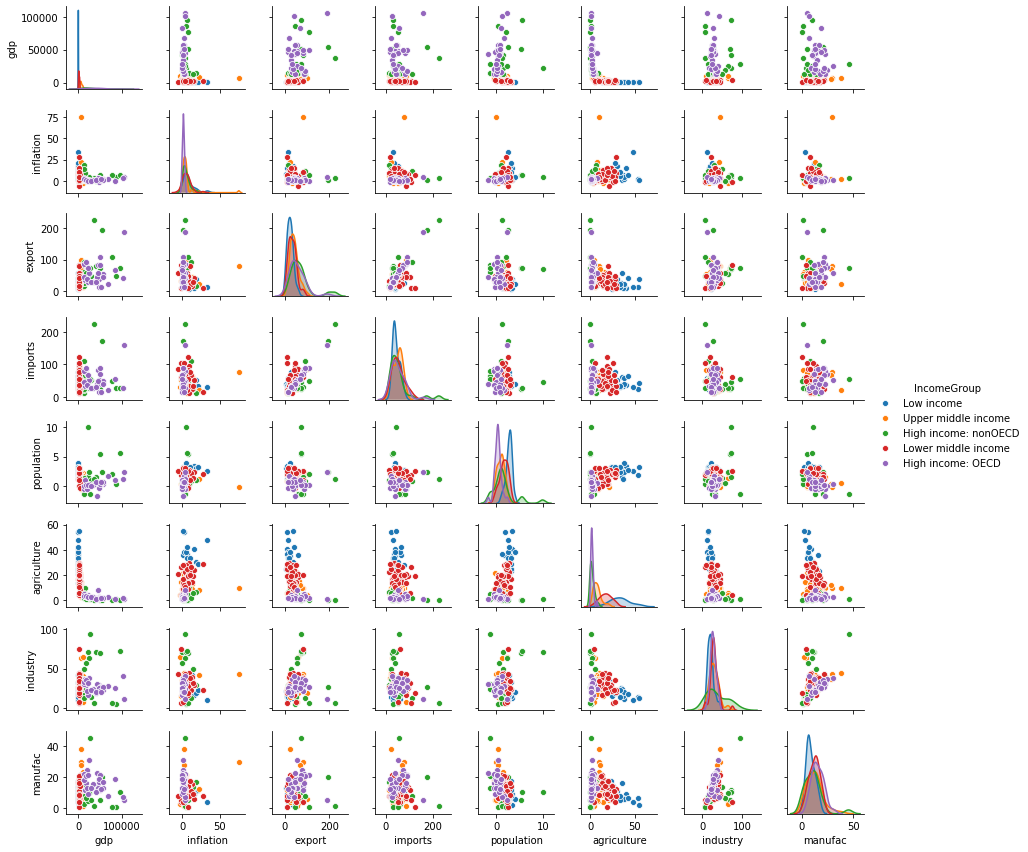

In [23]:
sns_plot = sns.pairplot(variables,hue="IncomeGroup",size=1.5)

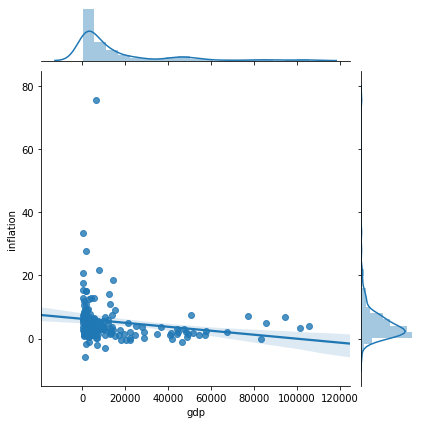

In [24]:
sns.jointplot(x="gdp",y="inflation",data=variables,kind="reg")


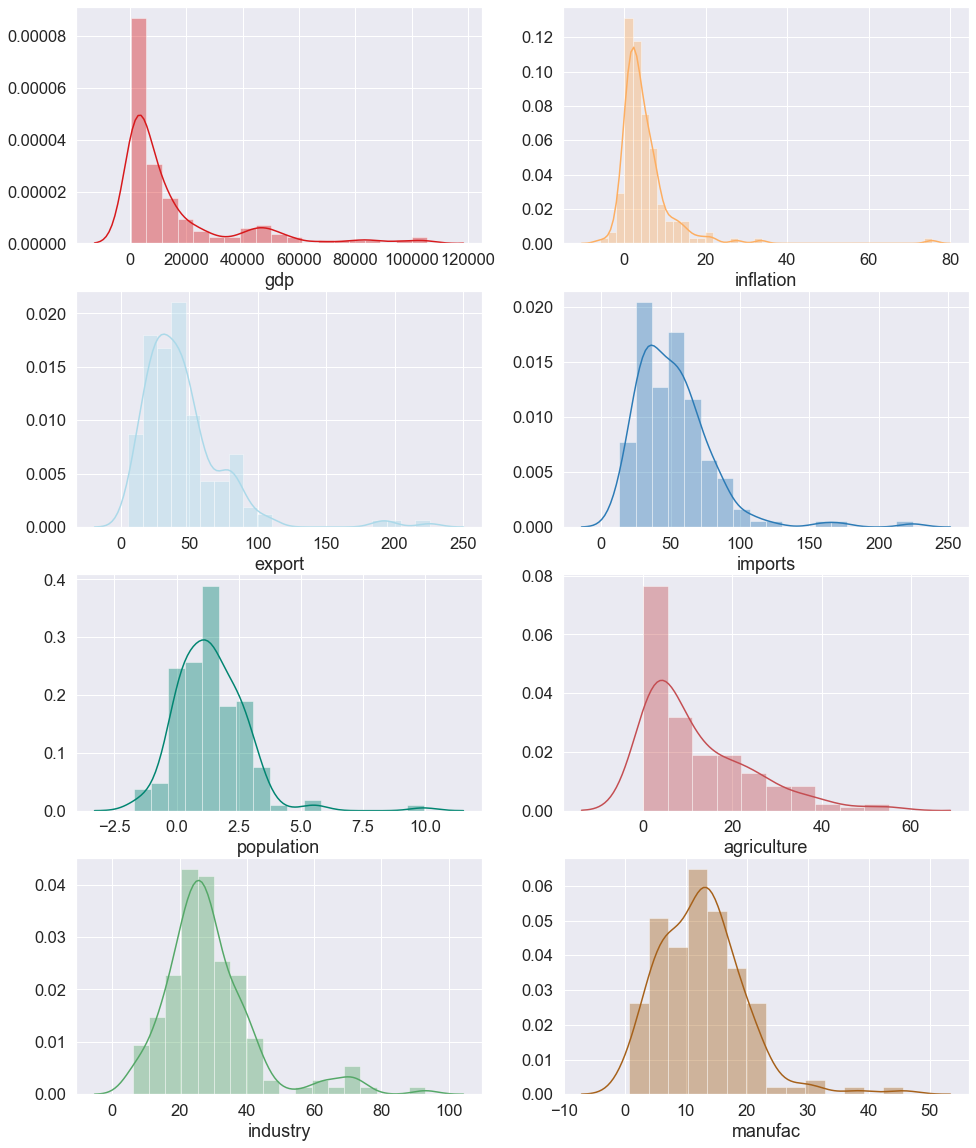

In [25]:
sns.set(style="darkgrid",font_scale=1.5)

f, axes = plt.subplots(4,2,figsize=(16,20))

sns.distplot(variables["gdp"],color="#d7191c",ax=axes[0,0])

sns.distplot(variables["inflation"],color="#fdae61",ax=axes[0,1])

sns.distplot(variables["export"],color="#abd9e9",ax=axes[1,0])

sns.distplot(variables["imports"],color="#2c7bb6",ax=axes[1,1])

sns.distplot(variables["population"],color="#018571",ax=axes[2,0])

sns.distplot(variables["agriculture"],color="r",ax=axes[2,1])

sns.distplot(variables["industry"],color="g",ax=axes[3,0])

sns.distplot(variables["manufac"],color="#a6611a",ax=axes[3,1])